
# Cleaning and Transforming Retail Customer Data for Sales Predictions

## Problem Statement
The goal is to prepare a raw retail customer dataset for predictive analytics, focusing on sales forecasting and customer behavior insights. This involves:
1. Cleaning the data by addressing missing values, duplicates, and outliers.
2. Transforming the data into a structured format suitable for predictive modeling.
3. Conducting exploratory data analysis (EDA) to uncover key insights.
4. Preparing the final dataset for machine learning.

## Approach
1. **Data Cleaning**:
   - Handle missing values by imputation or removal.
   - Remove duplicate records.
   - Identify and treat outliers using statistical methods.
2. **Data Transformation**:
   - Standardize date and time formats.
   - Engineer features such as `DayOfWeek` and `IsHoliday`.
   - Normalize and encode categorical variables.
3. **Exploratory Data Analysis**:
   - Visualize distributions, trends, and patterns in data.
   - Summarize key metrics for customer and product behavior.
4. **Final Preparation**:
   - Partition the data into training and testing sets.
   - Ensure numerical features are scaled for machine learning algorithms.

Each step is implemented as a modular code block for clarity and reusability.

---

## Steps and Code Implementation


In [4]:
import pandas as pd
# Load the dataset
file_path = 'Retail_Customer_Data.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43567 entries, 0 to 43566
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    43567 non-null  object 
 1   CustomerID       43567 non-null  object 
 2   CustomerName     43567 non-null  object 
 3   Gender           43567 non-null  object 
 4   Age              43567 non-null  int64  
 5   City             43567 non-null  object 
 6   State            43567 non-null  object 
 7   ZipCode          43567 non-null  int64  
 8   ProductID        43567 non-null  object 
 9   ProductName      43567 non-null  object 
 10  Category         43567 non-null  object 
 11  SubCategory      43567 non-null  object 
 12  Brand            43567 non-null  object 
 13  Price            43567 non-null  float64
 14  Quantity         43567 non-null  int64  
 15  Discount         43567 non-null  float64
 16  Tax              43567 non-null  float64


### Loading the Dataset
The dataset is loaded using `pandas.read_csv`. Initial exploration includes:
- Viewing data structure and types using `data.info()`.
- Displaying the first few rows with `data.head()` to understand the content.


In [5]:

# Step 2: Data Cleaning

# Handle missing values
data.fillna({
    'Gender': 'Unknown',
    'Age': data['Age'].median(),
    'Discount': 0,
    'Tax': 0,
    'TotalAmount': data['Price'] * data['Quantity'] - data['Discount'] + data['Tax']
}, inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Identify and treat outliers in numeric columns
numeric_cols = ['Price', 'Quantity', 'Discount', 'Tax', 'TotalAmount']
for col in numeric_cols:
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



### Data Cleaning
1. **Handling Missing Values**:
   - Missing categorical values are filled with 'Unknown'.
   - Numeric values use median imputation or logical replacements.
2. **Removing Duplicates**:
   - Duplicate rows are identified and removed to ensure data consistency.
3. **Outlier Detection**:
   - Interquartile Range (IQR) is used to remove outliers in numerical columns, improving data reliability.


In [6]:

# Step 3: Data Transformation

# Convert TransactionDate to datetime and extract features
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()
data['IsWeekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'City', 'State', 'Category', 'SubCategory', 'Brand', 'PaymentMethod', 'Region'], drop_first=True)



### Data Transformation
1. **Feature Engineering**:
   - Extract `DayOfWeek` and `IsWeekend` features from the transaction date.
2. **Encoding Categorical Variables**:
   - One-hot encoding is applied to categorical columns for compatibility with machine learning models.


                Age       ZipCode         Price      Quantity      Discount  \
count  43199.000000  43199.000000  43199.000000  43199.000000  43199.000000   
mean      43.404454  54993.531725    251.659803      4.966481     24.948719   
min       18.000000  10006.000000      5.020000      1.000000      0.000000   
25%       30.000000  32366.500000    129.025000      3.000000     12.530000   
50%       43.000000  55024.000000    252.230000      5.000000     24.950000   
75%       56.000000  77485.500000    373.865000      7.000000     37.360000   
max       69.000000  99995.000000    499.990000      9.000000     50.000000   
std       15.048265  26050.505567    142.078453      2.559806     14.378384   

                Tax   TotalAmount                TransactionDate  \
count  43199.000000  43199.000000                          43199   
mean      10.000744   1225.119603  2025-06-26 13:29:45.207991552   
min        0.000000    -37.110000            2023-01-01 00:00:00   
25%        4.980

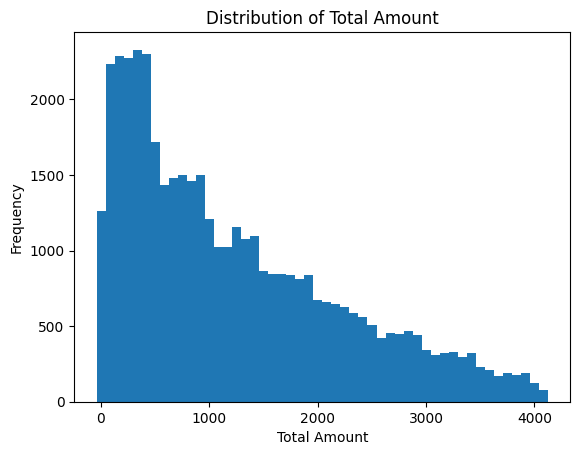

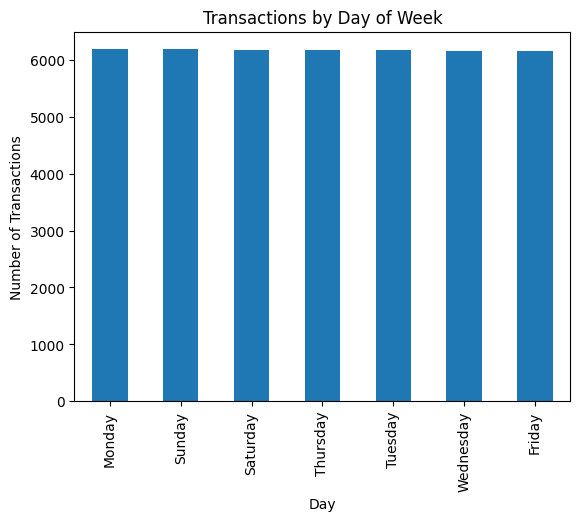

In [7]:

# Step 4: Exploratory Data Analysis (EDA)

# Summary statistics
print(data.describe())

# Visualize key trends
import matplotlib.pyplot as plt

# Sales distribution
plt.hist(data['TotalAmount'], bins=50)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Transactions by Day of Week
data['DayOfWeek'].value_counts().plot(kind='bar')
plt.title('Transactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()



### Exploratory Data Analysis
1. **Descriptive Statistics**:
   - `data.describe()` summarizes key statistics for numerical columns.
2. **Visualizations**:
   - Sales distribution is visualized using a histogram.
   - Bar chart shows transaction count by day of the week to identify patterns.


In [8]:

# Step 5: Final Preparation

# Splitting the data
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['TotalAmount'])
y = data['TotalAmount']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets prepared.")


Training and testing sets prepared.



### Final Preparation
- Features (`X`) and target variable (`y`) are separated.
- Data is split into training and testing sets using `train_test_split` with an 80-20 split.
